Saving sample.jpg to sample.jpg
sample.jpg


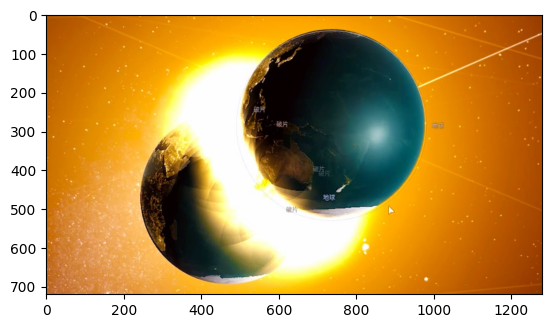

In [ ]:
# -*- coding: utf-8 -*-
"""画像処理演習14week

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1t4yTtsnoUoIMO2EsDN1-KP_bEw6vMpoD

ライブラリの読み込み
"""

import cv2
import matplotlib.pyplot as plt
import numpy as np

from google.colab.patches import cv2_imshow

"""画像を取り込む"""

from google.colab import files
uploaded_file = files.upload()

"""next(iter(uploaded_file))でファイル名をアクセスできる。

"""

uploaded_file_name = next(iter(uploaded_file))
print(uploaded_file_name)

"""画像を表示してみる
OpenCVを使って画像を読み込む。OpenCVでは画像は色が(現在では)一般的なRGBではなくBGRで扱われる。それだと後々不便なので、cvtColorを使ってRGBに変換しておく。
"""

orig = cv2.imread(uploaded_file_name)
img = cv2.cvtColor(orig, cv2.COLOR_BGR2RGB)

from matplotlib import pyplot as plt

plt.imshow(img)

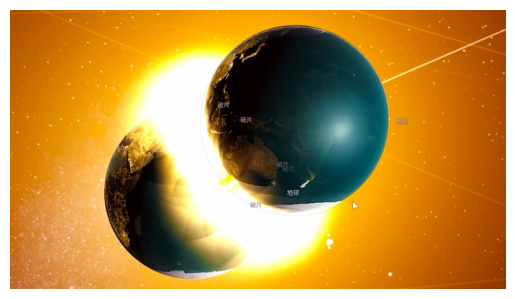

In [ ]:
"""チャネル入れ替え"""

b = img[:,:,0].copy()
g = img[:,:,1].copy()
r = img[:,:,2].copy()

inv_img = img.copy()
inv_img[:,:,0] = r
inv_img[:,:,1] = g
inv_img[:,:,2] = b

plt.axis('off')
plt.imshow(cv2.cvtColor(inv_img, cv2.COLOR_BGR2RGB))

threshold >> 147


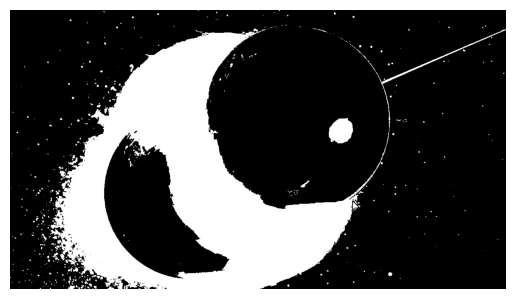

In [ ]:

"""二値化"""

b = img[:, :, 0].copy()
g = img[:, :, 1].copy()
r = img[:, :, 2].copy()

# Gray scale
gray_img = 0.2126 * r + 0.7152 * g + 0.0722 * b
gray_img = gray_img.astype(np.uint8)

height ,width ,color = img.shape
#print(h, w, c)

max_sigma = 0
max_th = 0

for th in range(255):
  v0 = gray_img[np.where(gray_img < th)]
  m0 = np.mean(v0) if len(v0) > 0 else 0.
  w0 = len(v0) / (height * width)
  v1 = gray_img[np.where(gray_img >= th)]
  m1 = np.mean(v1) if len(v1) > 0 else 0.
  w1 = 1 - w0
  sigma = w0 * w1 * ((m0 - m1) ** 2)
  if sigma > max_sigma:
    max_sigma = sigma
    max_th = th

print("threshold >>", max_th)

binary_img = gray_img.copy()
binary_img[binary_img < max_th] = 0
binary_img[binary_img >= max_th] = 255

cv2.imwrite("binary_img.jpg", binary_img)
binary_img = cv2.imread("binary_img.jpg")
plt.axis('off')
plt.imshow(cv2.cvtColor(binary_img, cv2.COLOR_BGR2RGB))

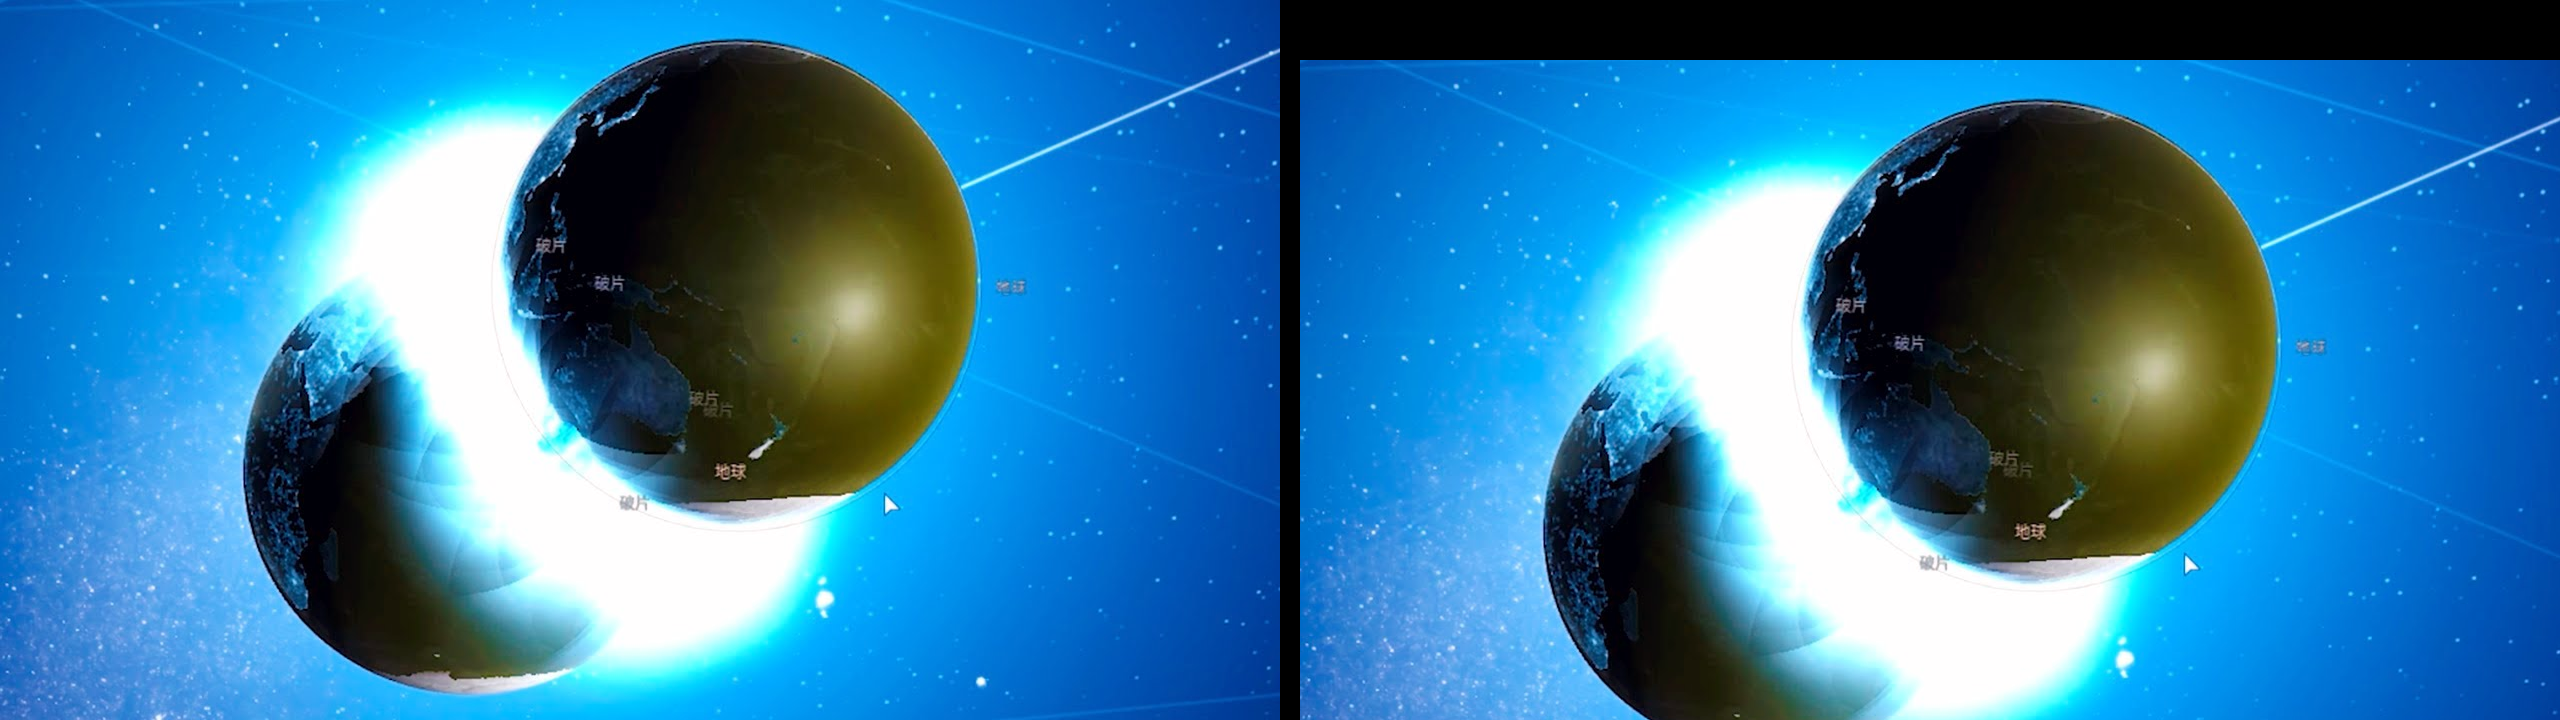

In [ ]:
"""アフィン変換　平行移動"""
h, w = img.shape[:2]

t_x = 20
t_y = 60
mat1 = np.float32([[1, 0, t_x], [0, 1, t_y]])
img1 = cv2.warpAffine(img, mat1, (w, h))

imgs = cv2.hconcat([img, img1])
cv2_imshow(imgs)


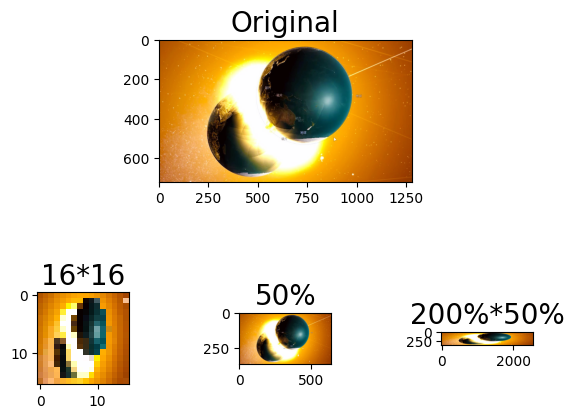

In [ ]:
"""アフィン変換　拡大縮小"""

#新規ウインドウ作成
fig = plt.figure()

height = img.shape[0]
width = img.shape[1]

#オリジナル画像
ax1 = fig.add_subplot(2, 1, 1)
ax1.set_title("Original",fontsize=20)
plt.imshow(img)

#16×16
ax2 = fig.add_subplot(2, 3, 4)
ax2.set_title("16*16",fontsize=20)
plt.imshow(cv2.resize(img,(16,16)))

#50%
ax3 = fig.add_subplot(2, 3, 5)
ax3.set_title("50%",fontsize=20)
plt.imshow(cv2.resize(img,(int(width*0.5),int(height*0.5))))

#200%*50%
ax3 = fig.add_subplot(2, 3, 6)
ax3.set_title("200%*50%",fontsize=20)
plt.imshow(cv2.resize(img,(int(width*2),int(height*0.5))))
plt.subplots_adjust(hspace=0.6,wspace=1.2) #グラフ間隔を調整。

plt.show()

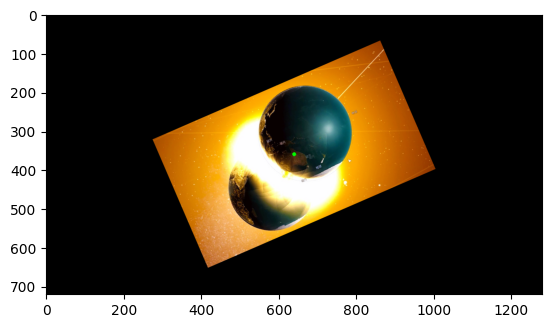

In [ ]:
"""アフィン変換　回転"""

height = img.shape[0]
width = img.shape[1]
kaitenP = (int(width/2),int(height/2)) #中央を支点に回転させる
#kaitenP = (80,80)
cv2.circle(img,kaitenP,10,(0,255,0),-1)#支点を表示

#回転処理
deg = 23.4
bairitu = 0.5
affin_trans = cv2.getRotationMatrix2D(kaitenP,deg,bairitu)
dst = cv2.warpAffine(img,affin_trans,(width,height))

plt.imshow(dst)
